# Academic Integrity



I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym 
from gym import spaces

In [2]:
grid = np.zeros((8, 8))
print(grid)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
pos1 = [0, 0]
pos2 = [7, 7]

alternate = False
for i in range(8):
    for j in range(8):
        grid[i][j] = 1 if not alternate else 0
        alternate = not alternate
    alternate = not alternate
print(grid)

[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]


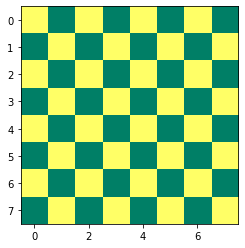

In [4]:
plt.imshow(grid,cmap='summer')

In [5]:
from itertools import filterfalse
class GridEnvironment(gym.Env):
    
    metadata = { 'render.modes': []}

    def __init__(self, max_timesteps):
        self.observation_space = spaces.Discrete(64)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = max_timesteps
        self.state = grid.copy()

    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 2]
        self.goal_pos = [6, 4]
        self.state = grid.copy()
        self.state[tuple(self.agent_pos)] = 20
        observation = self.state.flatten()
    
        return observation

    def step(self, action):
    
        if action == 0:
              self.agent_pos[0] += 1 #going right
        elif action == 1:
              self.agent_pos[0] -= 1 #left
        elif action == 2:
              self.agent_pos[1] += 1 #backward
        elif action == 3:
              self.agent_pos[1] -= 1 #forward
        else:
              return None, -100, False, {}

        self.agent_pos = np.clip(self.agent_pos, 0, 7) #safety func to keep agent in gridworld
        self.agent_pos = np.clip(self.agent_pos, 0, 7)
        self.state = grid.copy()
        
        self.state[tuple(self.goal_pos)] = 5
        self.state[tuple(self.agent_pos)] = 20
        observation = self.state.flatten()
        reward = -0.2

        self.timestep += 1
        done = False 
        if self.timestep >= self.max_timesteps or tuple(self.goal_pos) == tuple(self.agent_pos):
            done = True
        info = {}
        if (self.agent_pos == self.goal_pos).all() and self.state[tuple(self.agent_pos)] == 20:
              reward = 100
        elif (self.agent_pos == [1,4]).all() and self.state[tuple(self.agent_pos)] == 0:
              reward = -20
        elif (self.agent_pos == [6,3]).all() and self.state[tuple(self.agent_pos)] == 0:
              reward = -30
        elif (self.agent_pos == [2,3]).all() and self.state[tuple(self.agent_pos)]== 0:
              reward = -10
        elif (self.agent_pos == [0,0]).all() and self.state[tuple(self.agent_pos)]== 1:
              reward = 50
        elif (self.agent_pos == [0,4]).all() and self.state[tuple(self.agent_pos)]== 1:
              reward = 60    
        return observation, reward, done, info

    def render(self):
        plt.imshow(self.state, cmap = "summer")
    #plt.show()

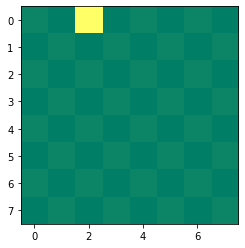

In [6]:
env = GridEnvironment(5)
obs = env.reset()
env.render()

Reward:  -0.2
Reward:  -0.2
Reward:  -0.2
Reward:  -0.2
Reward:  -100
Reward:  -0.2
Reward:  -0.2
Reward:  -0.2
Reward:  -0.2
Reward:  -100


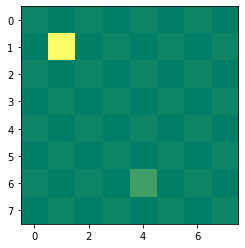

In [7]:
action = 4
action_space = spaces.Discrete(5)
for i in range(10):
  observation, reward, done, _ = env.step(action_space.sample())
  env.render()
  print('Reward: ', reward)
  #plt.savefig(f"deterministic{i}.png")  
  #plt.show()

In [8]:
# STOCHASTIC ENVIRONMENT 

from itertools import filterfalse
class GridEnvironmentSto(gym.Env):
    #metadata = { 'render.modes': []}

      def __init__(self, max_timesteps):
        self.observation_space = spaces.Discrete(64)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = max_timesteps
        self.state = grid.copy()

      def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 2]
        self.goal_pos = [6, 4]
        self.state = grid.copy()
        self.state[tuple(self.agent_pos)] = 20
        observation = self.state.flatten()

        return observation
      def prob_stochastic(self,action):
        return np.random.choice([action,None],p=(0.95,0.05))

      def step(self, action):
        action = self.prob_stochastic(action)
        if action ==None:
           action == 0
           self.agent_pos[0] += 1 #going right

        else :
           if action == 0:
             self.agent_pos[0] += 1
           elif action == 1:
               self.agent_pos[0] -= 1 #left
           elif action == 2:
               self.agent_pos[1] += 1 #backward
           elif action == 3:
               self.agent_pos[1] -= 1 #forward
           elif action == 4:           #diagonal
               self.agent_pos[0] += 1 
               self.agent_pos[1] -= 1 

        #else:
         # return None, -100, False, {}

        self.agent_pos = np.clip(self.agent_pos, 0, 7) #safety func to keep agent in gridworld
        self.agent_pos = np.clip(self.agent_pos, 0, 7)
        self.state = grid.copy()
        self.state[tuple(self.goal_pos)] = 5
        self.state[tuple(self.agent_pos)] = 20
       
        observation = self.state.flatten()
        reward = -0.2

        self.timestep += 1
        done = False 
        if self.timestep >= self.max_timesteps or tuple(self.goal_pos) == tuple(self.agent_pos):
            done = True
        info = {}
        if (self.agent_pos == self.goal_pos).all() and self.state[tuple(self.agent_pos)] == 20:
              reward = 100
        elif (self.agent_pos == [1,4]).all() and self.state[tuple(self.agent_pos)] == 0:
              reward = -20
        elif (self.agent_pos == [6,3]).all() and self.state[tuple(self.agent_pos)] == 0:
              reward = -30
        elif (self.agent_pos == [2,3]).all() and self.state[tuple(self.agent_pos)]== 0:
              reward = -10
        elif (self.agent_pos == [0,0]).all() and self.state[tuple(self.agent_pos)]== 1:
              reward = 50
        elif (self.agent_pos == [0,4]).all() and self.state[tuple(self.agent_pos)]== 1:
              reward = 60    
        return observation, reward, done, info

      def render(self):
        plt.imshow(self.state, cmap = "summer")
        plt.show()

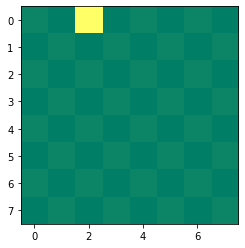

In [9]:
env = GridEnvironmentSto(5)
obs = env.reset()
env.render()

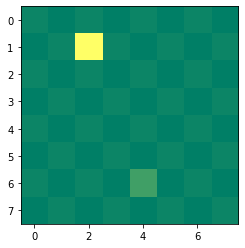

Reward:  -0.2


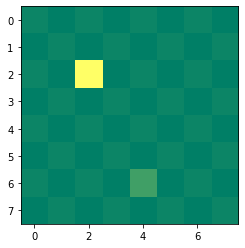

Reward:  -0.2


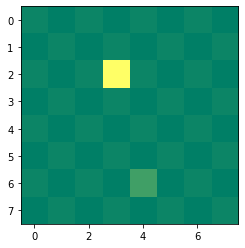

Reward:  -0.2


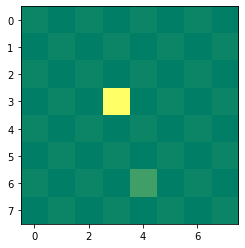

Reward:  -0.2


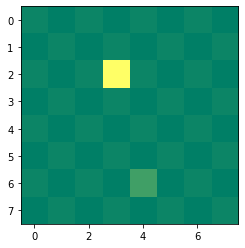

Reward:  -0.2


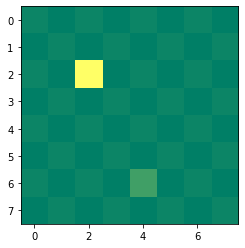

Reward:  -0.2


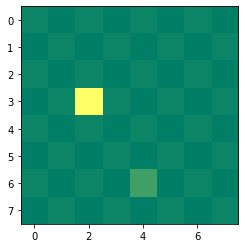

Reward:  -0.2


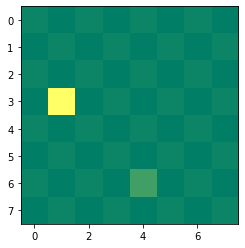

Reward:  -0.2


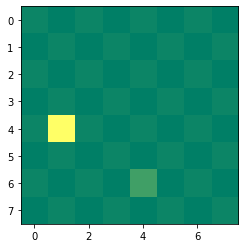

Reward:  -0.2


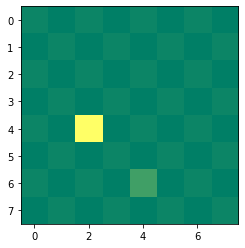

Reward:  -0.2


In [10]:
action = 4
action_space = spaces.Discrete(5)
for i in range(10):
  observation, reward, done, _ = env.step(action_space.sample())
  env.render()
  print('Reward: ', reward)
  #plt.savefig(f"Stochastic_Img{i}.png")
  #plt.show()

In [11]:
class RandomAgent:

  def __init__(self, env):
    self.env= env
    self.observation_space= env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

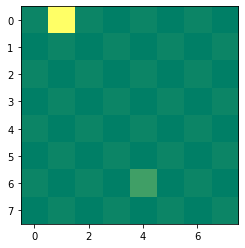

In [12]:
env= GridEnvironment(5)
agent= RandomAgent(env)

obs =env.reset()

done = False

while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)  
  env.render()

In [13]:
#pip install plotting

# Part 2: Applying Tabular Methods


## 2.1.1: Q Learning on Deterministic environment 

In [14]:
def get_action(env, Q, state, epsilon):  
                            #getting epsilon based action
    action_probability = random.random() 
    if action_probability < epsilon:
        action = env.action_space.sample() 
                            # Exploration done on the basis of action
    else:
        action = np.argmax(Q[state])
    return action

In [15]:
import plotting
import itertools
import random
import pandas as pd
from collections import defaultdict
from collections import namedtuple
EpisodeStats = namedtuple("Q_Stats",["e_length", "e_rewards"])

def qlearning(env, num_of_episodes, gamma = 0.8, alpha = 0.2):
                                                    # alpha - learning rate
                                                    # gamma - discount factor
    qtable = np.zeros([env.observation_space.n, env.action_space.n])
    
    Q_Stats = EpisodeStats(e_length = np.zeros(num_of_episodes),e_rewards = np.zeros(num_of_episodes))    
    
    e = np.geomspace(0.8, 0.1, num = num_of_episodes)
    
    for _ in range(num_of_episodes):
        
        state = env.reset()
        state = np.where(state == 20)[0][0]
        done = False
        steps = 0
        rewards = 0
        epsilon = e[_]
        while not done:
            steps += 1
#             action_probability = random.random() #number between 0 and 1
#             if action_probability < epsilon:
#                 action = env.action_space.sample() # Exploring action space
#             else:
#                 action = np.argmax(qtable[state]) # Exploiting learnt values
            
            action = get_action(env, qtable, state-1, epsilon)
            
            next_state, reward, done, information = env.step(action)
            
#             if done:
#                 break
                
            next_state = np.where(next_state == 20)[0][0]
            old_val = qtable[state, action] 
            next_action = get_action(env, qtable, next_state-1, epsilon)
            next_val = qtable[next_state-1, next_action]
            
#             next_max = np.max(qtable[next_state])
            # Calculating Q learning 
            new_val = (1 - alpha) * old_val + alpha * (reward + gamma * next_val)
            qtable[state - 1, action] = new_val
            state = next_state

            rewards += reward
        Q_Stats.e_length[_] = steps
        Q_Stats.e_rewards[_] = rewards
    return qtable, Q_Stats

In [16]:
env = GridEnvironment(80)
Q, Q_stats_det = qlearning(env, 100)

In [17]:
def plot_episode_stats_q(Q_Stats, smoothing_window=10, hideplot=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(40,20))
    plt.plot(Q_Stats.e_length)
    plt.ylabel("Episode Length")
    plt.xlabel("Episode Count")
    plt.title("Episode Length over the time period")
    if hideplot:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(Q_Stats.e_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Rewards of Episodes")
    plt.title("Episode Rewards over the time period {}".format(smoothing_window))
    if hideplot:
        plt.close(fig2)
    else:
        plt.show(fig2)

    return fig1, fig2

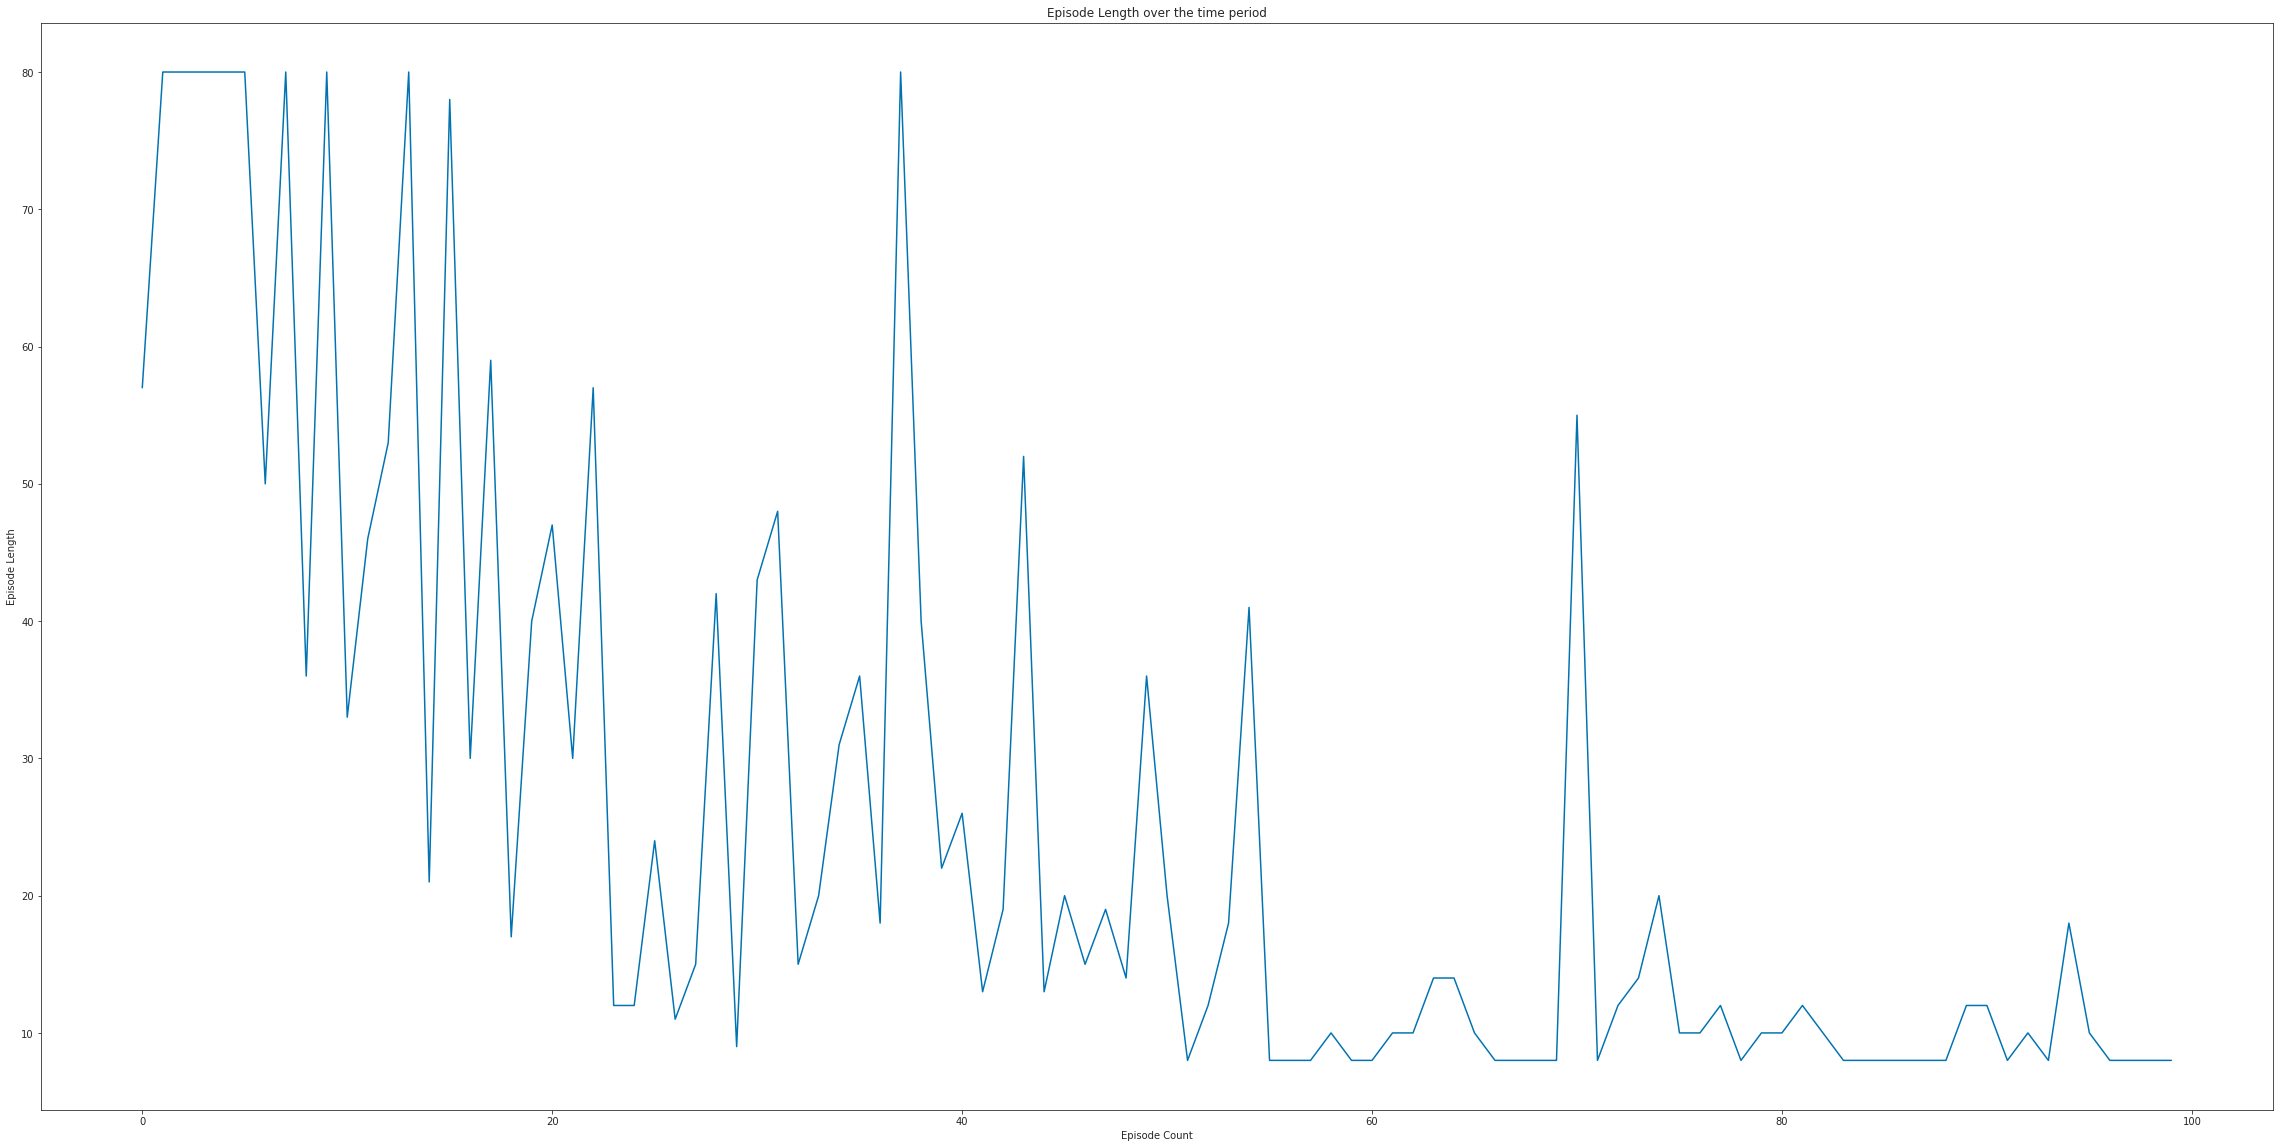

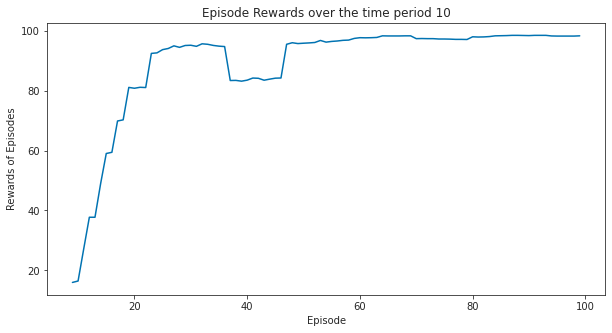

(<Figure size 2880x1440 with 1 Axes>, <Figure size 720x360 with 1 Axes>)

In [18]:
plot_episode_stats_q(Q_stats_det)

## 2.1.2: Q Learning on Stochastic environment 

In [19]:
env = GridEnvironment(80)
Q, Q_stats_sto = qlearning(env, 100)

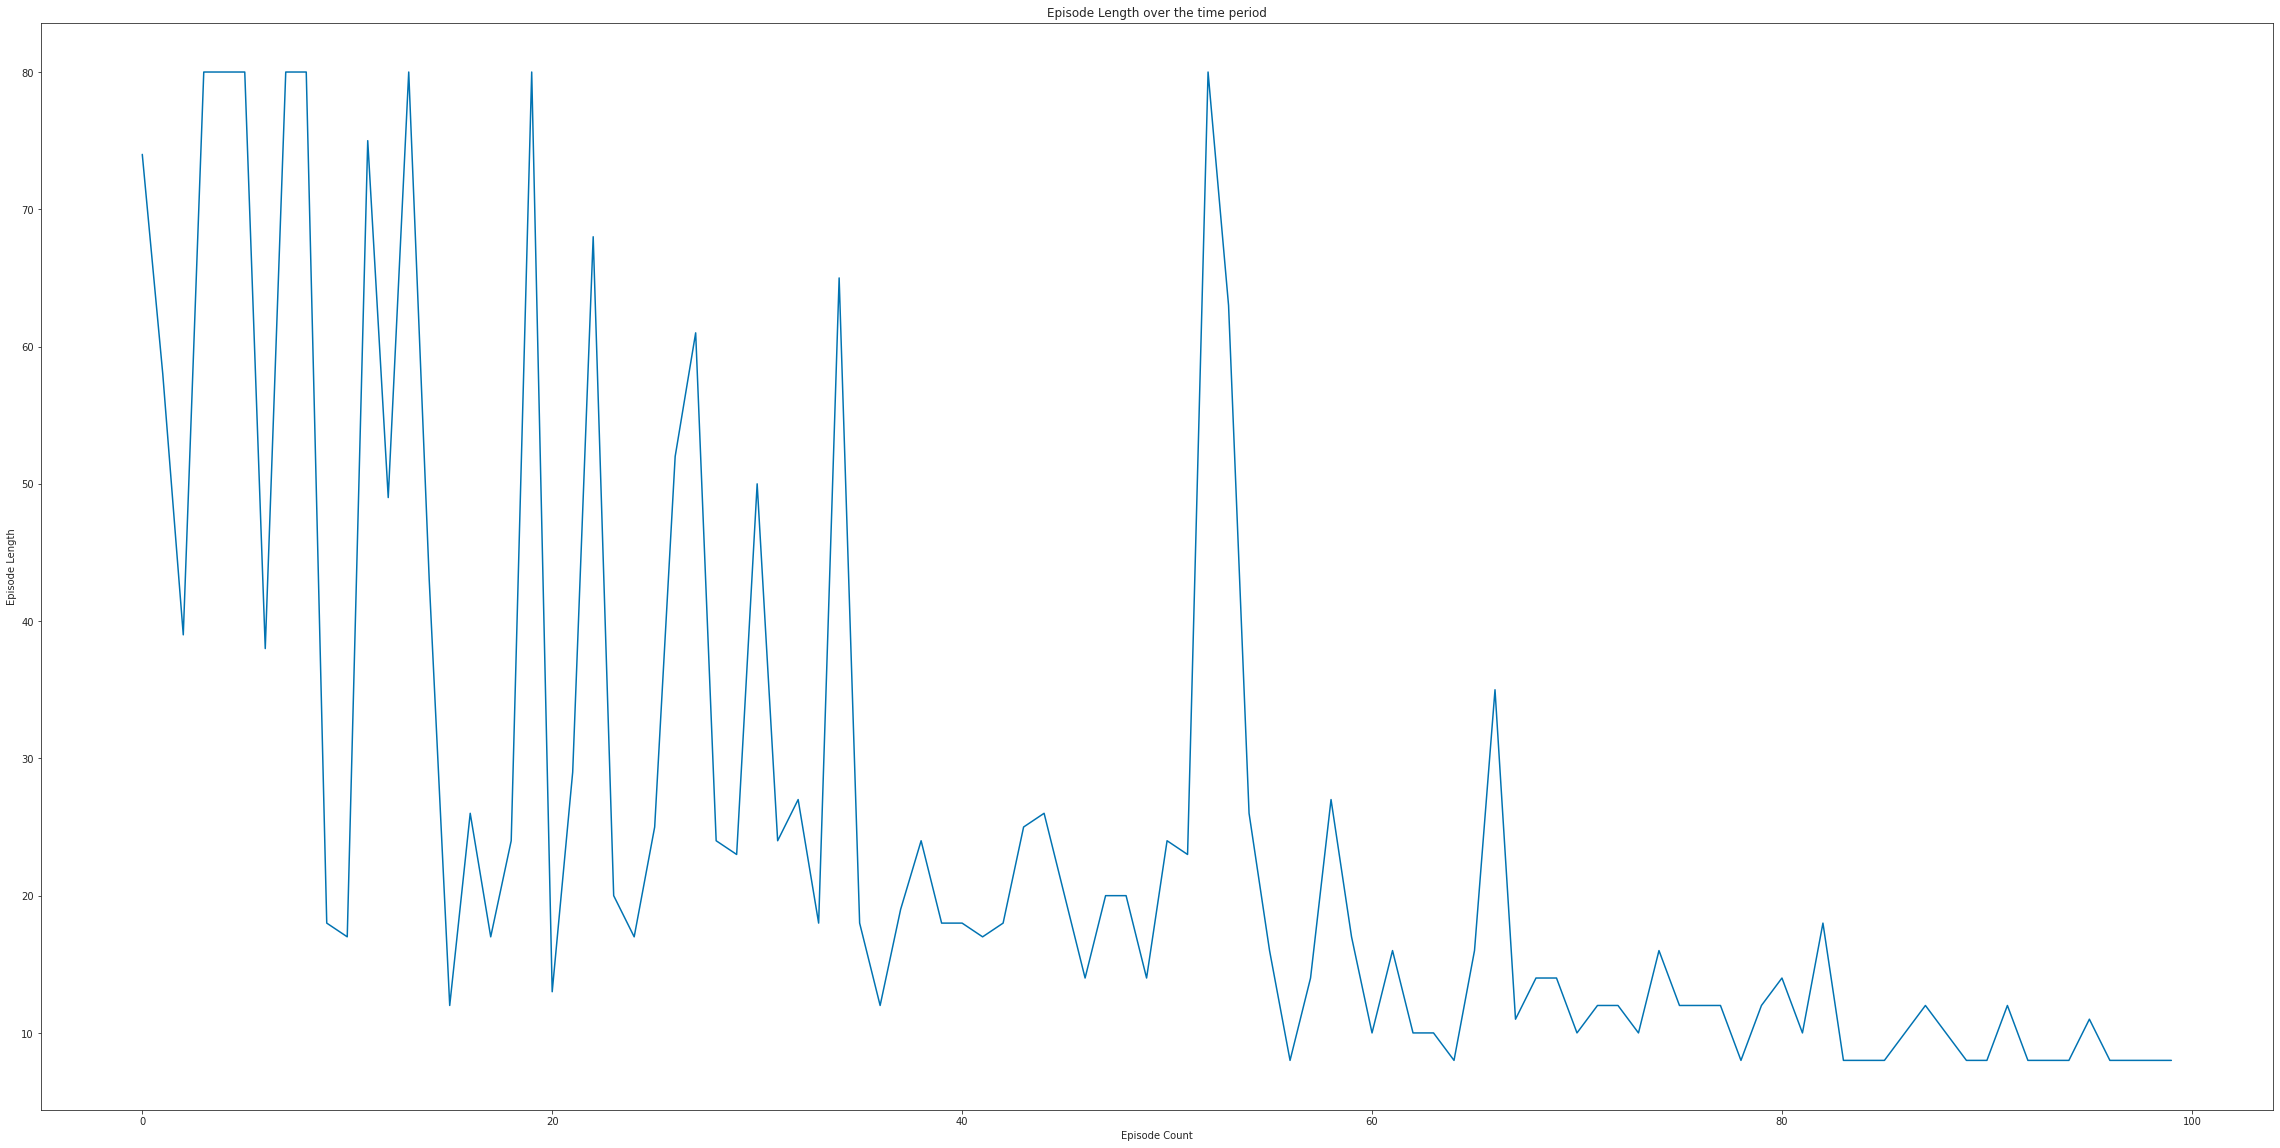

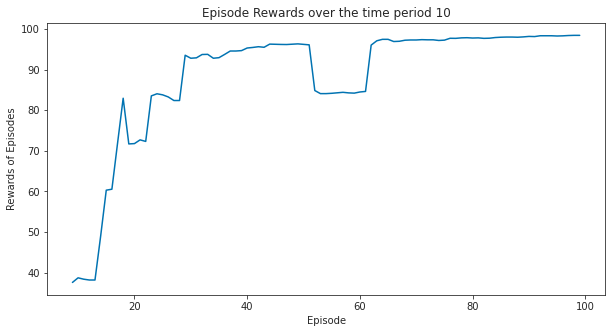

(<Figure size 2880x1440 with 1 Axes>, <Figure size 720x360 with 1 Axes>)

In [20]:
plot_episode_stats_q(Q_stats_sto)

## 2.1.3:  SARSA on Deterministic Environment

In [21]:
def get_action(env, Q, state, epsilon):  
                            #getting epsilon based action
    action_probability = random.random() 
    if action_probability < epsilon:
        action = env.action_space.sample() 
                            # Exploration done on the basis of action
    else:
        action = np.argmax(Q[state])
    return action

In [22]:
from collections import namedtuple
import random
EpisodeStats = namedtuple("Sarsa_Stats",["e_lengths", "e_rewards"])

def for_sarsa(env, num_of_episodes, gamma = 0.8,alpha = 0.1):
    qtable = np.zeros([env.observation_space.n, env.action_space.n])
    
    Sarsa_Stats = EpisodeStats(e_lengths = np.zeros(num_of_episodes),e_rewards = np.zeros(num_of_episodes))    
    e = np.geomspace(0.8,0.1, num=num_of_episodes)  #getting Epsilons
    for _ in range(num_of_episodes):
        state = env.reset()
        state = np.where(state == 20)[0][0]
        steps = 0
        rewards = 0
        done = False
        epsilon = e[_]
        while not done:
            steps += 1
            action = get_action(env, qtable, state-1, epsilon)
            next_state, reward, done, info = env.step(action)
            
            next_state = np.where(next_state == 20)[0][0]
            
            old_val = qtable[state, action]
            next_action = get_action(env, qtable, next_state-1, epsilon)
            next_val = qtable[next_state-1, next_action]
            
            new_val = (1 - alpha) * old_val + alpha * (reward + gamma * next_val)
            qtable[state-1, action] = new_val
            state = next_state
            rewards += reward
        Sarsa_Stats.e_rewards[_] = rewards
        Sarsa_Stats.e_lengths[_] = steps
        

    return qtable, Sarsa_Stats

In [23]:
# SARSA for Deterministic Environment
env = GridEnvironment(80)
Q, Sarsa_Stats_det = for_sarsa(env, 100)

In [24]:
def plot_episode_stats_sarsa(Sarsa_Stats, smoothing_window=10, hideplot=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(40,20))
    plt.plot(Sarsa_Stats.e_lengths)
    plt.ylabel("Episode Length")
    plt.xlabel("Episode Count")
    plt.title("Episode Length over the time period")
    if hideplot:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(Sarsa_Stats.e_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Rewards of Episodes")
    plt.title("Episode Rewards over the time period {}".format(smoothing_window))
    if hideplot:
        plt.close(fig2)
    else:
        plt.show(fig2)

    return fig1, fig2

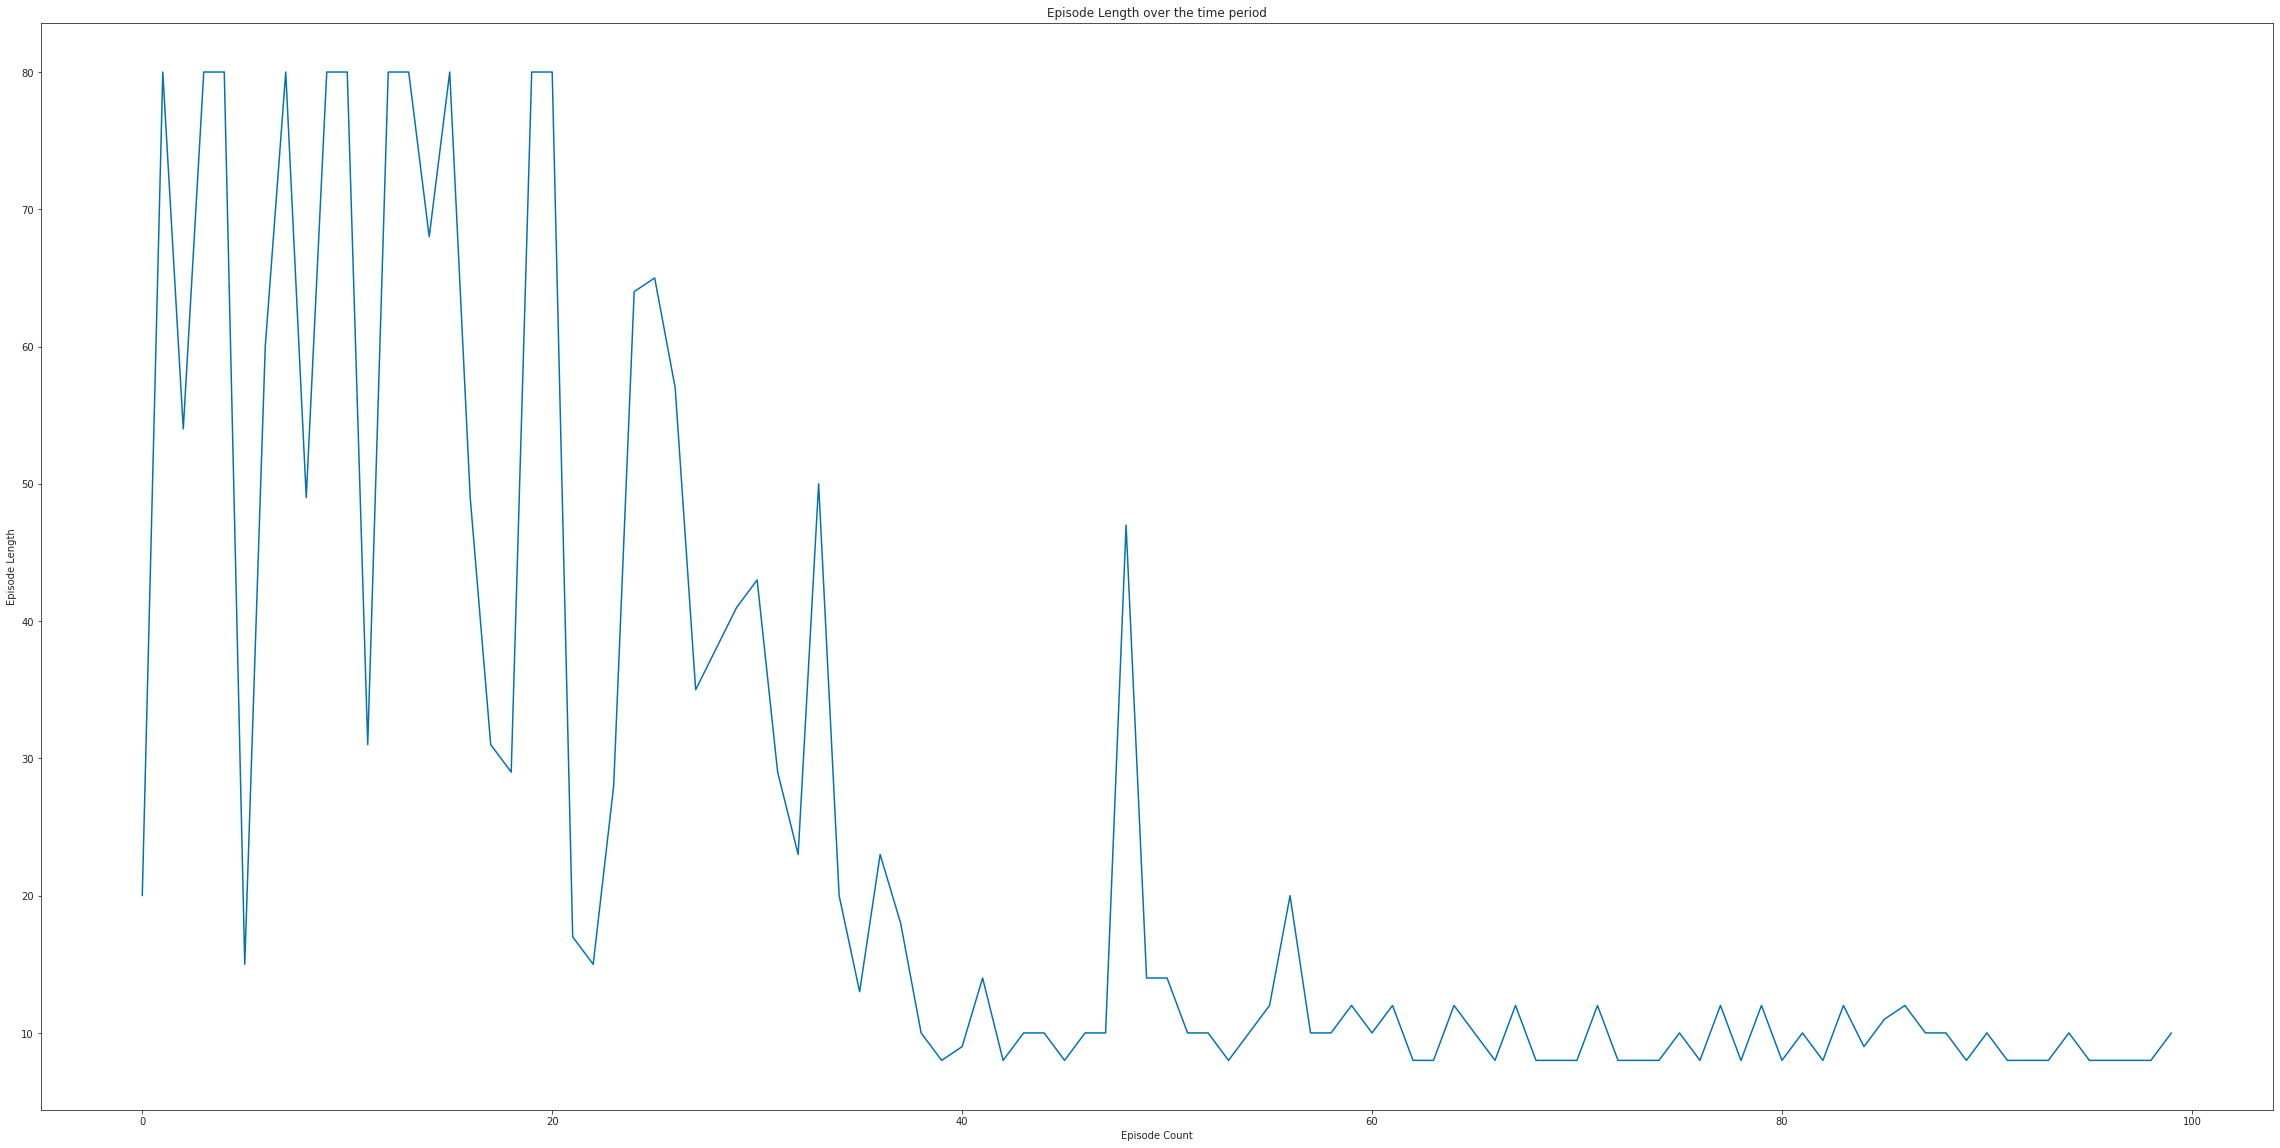

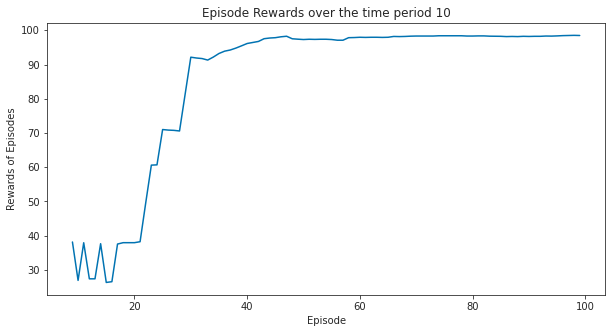

(<Figure size 2880x1440 with 1 Axes>, <Figure size 720x360 with 1 Axes>)

In [25]:
plot_episode_stats_sarsa(Sarsa_Stats_det)

## 2.1.4 : SARSA for Stochastic Environment

In [26]:
# SARSA For Stochastic Environment
env = GridEnvironmentSto(80)
Q1,Sarsa_Stats_sto = for_sarsa(env, 100)

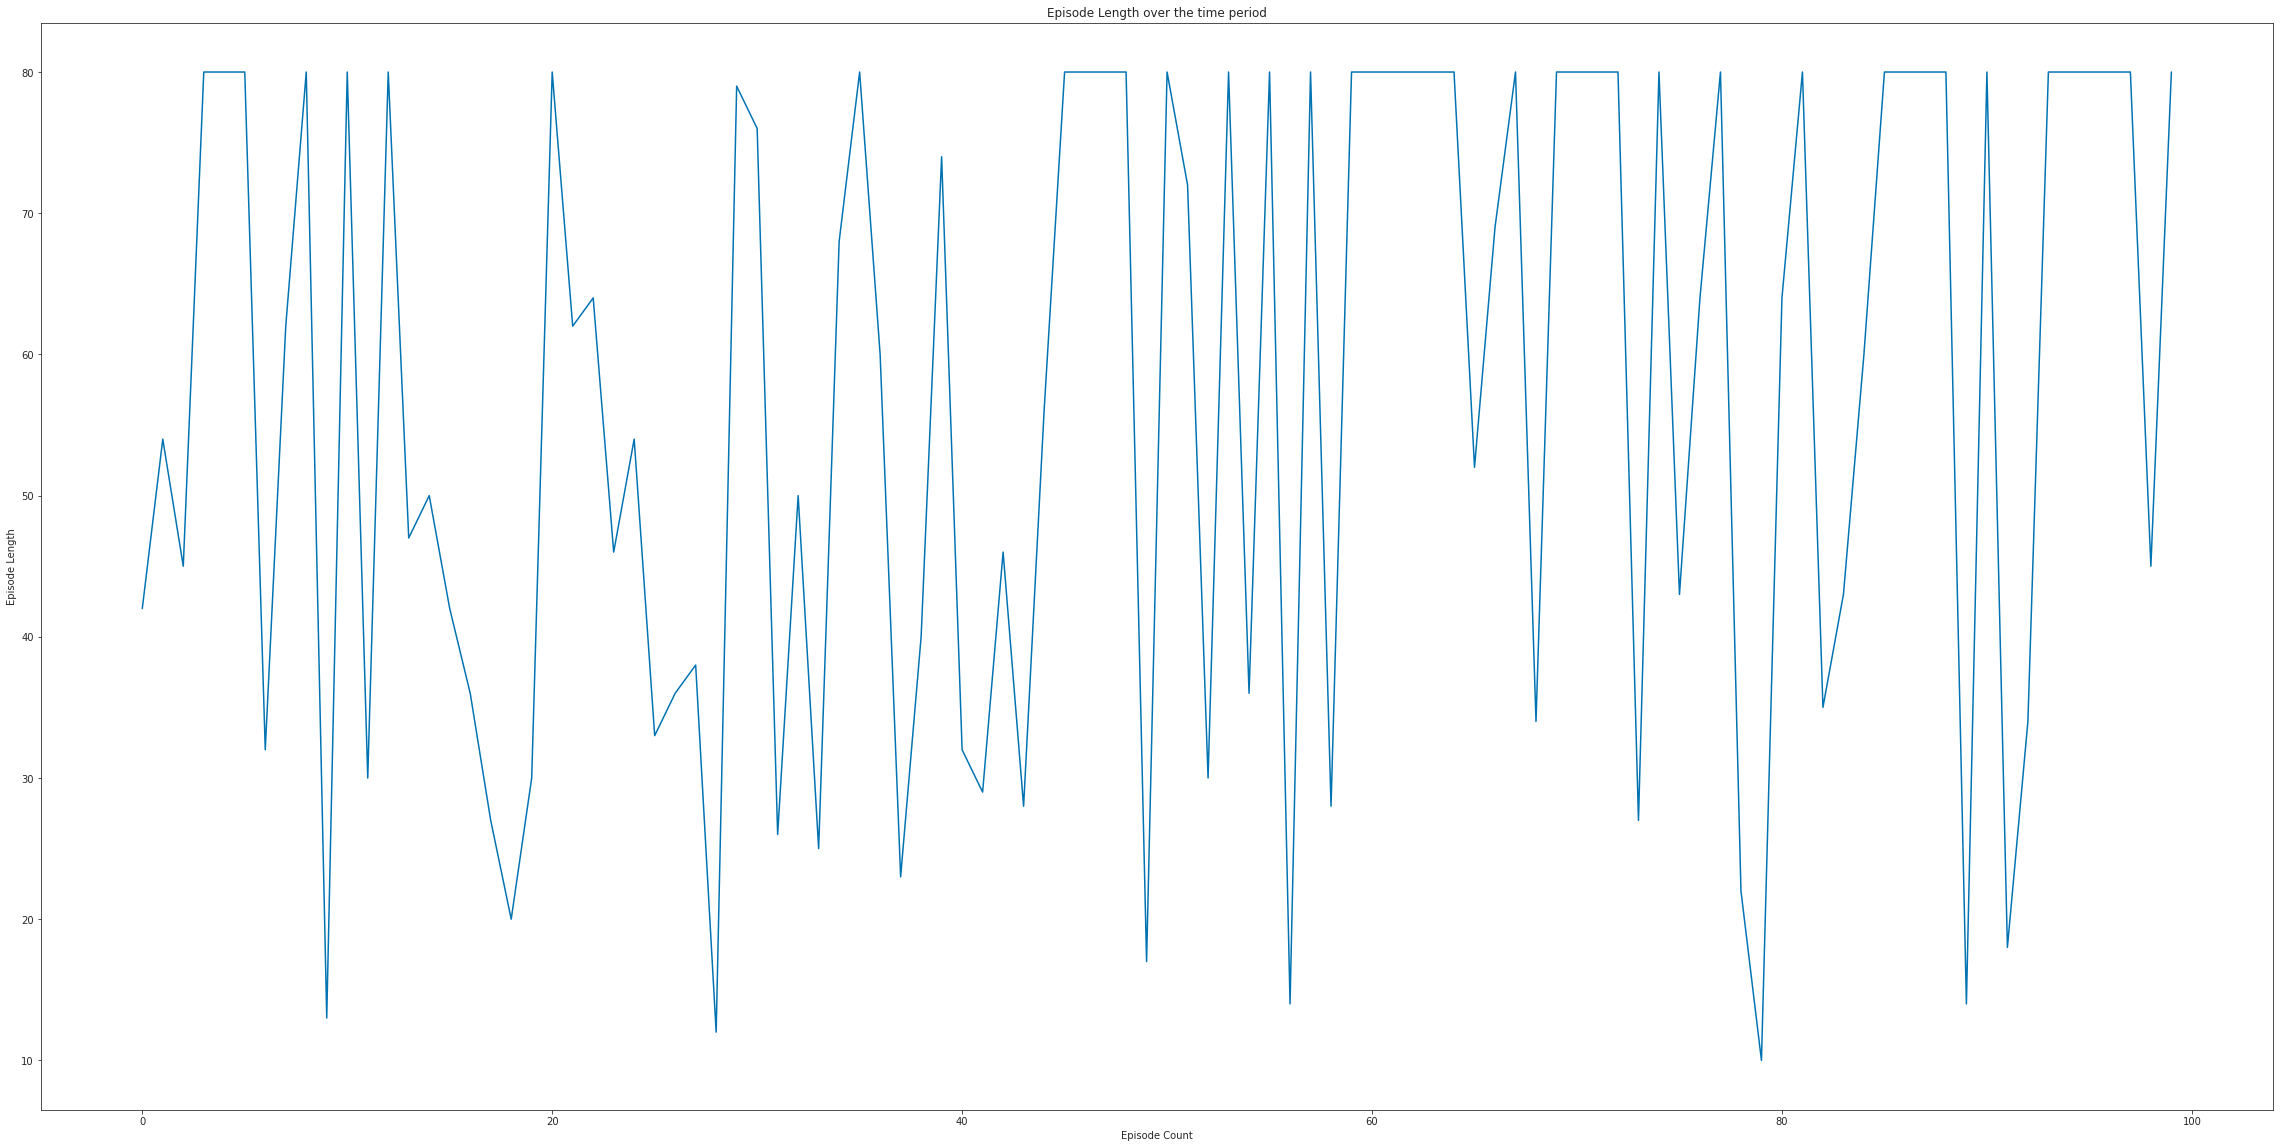

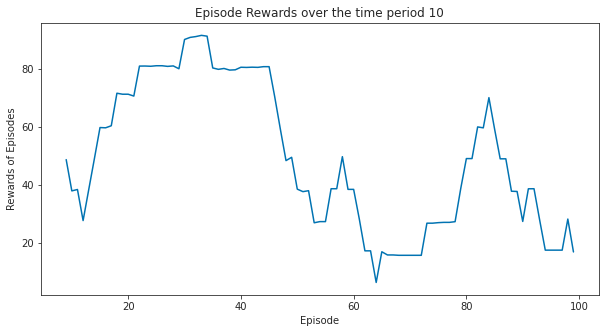

(<Figure size 2880x1440 with 1 Axes>, <Figure size 720x360 with 1 Axes>)

In [27]:
plot_episode_stats_sarsa(Sarsa_Stats_sto)

In [28]:
import numpy as np
import seaborn as sns
import plotly.express as px


<AxesSubplot:>

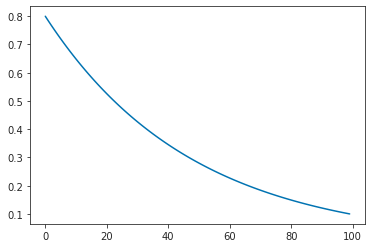

In [29]:
# Plotting Epsilon Decay 
epsilon_decay = np.geomspace(0.8, 0.1, num=100)
sns.lineplot(x=range(100), y=epsilon_decay)


In [30]:
# Hyper Parameter tuning
# Applying Hyperparameter tuning Deterministic Environment 


## 2.1.5 Evaluation Result

[98.6, 98.6, 98.6, 98.6, 98.6, 98.6, 98.6, 98.6, 98.6, 98.6]


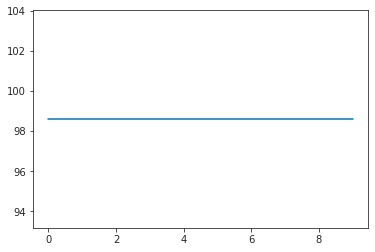

In [41]:
env = GridEnvironment(64)
# Training
qtable, Sarsa_Stats = for_sarsa(env, 100)

# Evaluation for 10 Episodes
rewards = []
for _ in range(10):
    state = env.reset()
    state = np.where(state == 20)[0][0]
    total_reward = 0
    done = False
    epsilon = 0 ### GREEDY ACTION
    while not done:
        action = get_action(env, qtable, state-1, epsilon)
        next_state, reward, done, info = env.step(action)

        state = np.where(next_state == 20)[0][0]
        total_reward += reward
    rewards.append(total_reward)

print(rewards)
plt.plot(rewards)


## 2.2 Comparing Q-Learning And SARSA in Deterministic Environment

In [32]:
df_SARSA = pd.DataFrame(np.array(Sarsa_Stats_det.e_rewards), columns = ['SARSA'])
df_Qlearning = pd.DataFrame(np.array(Q_stats_det.e_rewards), columns = ['Q-learning'])

df = pd.concat([df_Qlearning, df_SARSA], axis = 1)
fig = px.line(df, width=800, height=500)
fig.show()

## 2.3 Comparing Q-Learning And SARSA in Stochastic Environment

In [33]:
df_SARSA = pd.DataFrame(np.array(Sarsa_Stats_sto.e_rewards), columns = ['SARSA'])
df_Qlearning = pd.DataFrame(np.array(Q_stats_sto.e_rewards), columns = ['Q-learning'])

df = pd.concat([df_Qlearning, df_SARSA], axis = 1)
fig = px.line(df, width=800, height=500)
fig.show()

## 2.4 Breif Explanantion

Tabular Methods: 
   1. SARSA
   2. Q-Learning
   3. Double Q learning
   4. TD method
   5. Monte Carlo
Methods that I used for my environment are : 

Q-Learning :

It is model free method. It is able to compare the expected utility of the available actions without requiring a model of the environment.

Update Function:
Q-Learning: Q(s_{t},a_{t}) = Q(s_{t},a_{t}) + \alpha (r_{t+1}+\gamma max_{a}Q(s_{t+1},a)-Q(s_{t},a_{t}))


SARSA: 

It is model free methods. It attempts to evaluate or improve the policy that is used to make decisions,often use soft action choice,commit to always exploring and try to find the best policy that still explores,may become trapped in local minima.

Update Fucntion: 
SARSA: Q(s_{t},a_{t}) = Q(s_{t},a_{t}) + \alpha (r_{t+1}+\gamma Q(s_{t+1},a_{t+1})-Q(s_{t},a_{t}))